<H1>Data Exploration</H1><br>
Ultimate guide for Data Exploration in Python using NumPy, Matplotlib and Pandas:<br>
https://www.analyticsvidhya.com/blog/2015/04/comprehensive-guide-data-exploration-sas-using-python-numpy-scipy-matplotlib-pandas/#Ten <br>
Seaborn Cheat Sheet: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf <br>
Seaborn: Plotting with categorical data: http://seaborn.pydata.org/tutorial/categorical.html <br>

In [24]:
import numpy as np
data = np.genfromtxt("babies3.csv", delimiter=',', skip_header=1, dtype=int)
data

array([[120, 284,   0, ...,  62, 100,   0],
       [113, 282,   0, ...,  64, 135,   0],
       [128, 279,   0, ...,  64, 115,   1],
       ..., 
       [130, 291,   0, ...,  65, 150,   1],
       [125, 281,   1, ...,  65, 110,   0],
       [117, 297,   0, ...,  65, 129,   0]])

In [25]:
import pandas as pd      # built on top of numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns    # built on top of matplotlib
from pandas.api.types import CategoricalDtype # enables specifying categorical agetype below

In [26]:
df = pd.read_csv("babies2.csv") #Reading the dataset in a dataframe using Pandas
print df.head(5) 
df.describe()

   bwt  gestation  parity   age  height  weight  smoke  age_level birth_size
0  120      284.0       0  27.0    62.0   100.0    0.0   late_20s      small
1  113      282.0       0  33.0    64.0   135.0    0.0  early_30s      small
2  128      279.0       0  28.0    64.0   115.0    1.0   late_20s      large
3  123        NaN       0  36.0    69.0   190.0    0.0   late_30s      large
4  108      282.0       0  23.0    67.0   125.0    1.0  early_20s      small


,bwt,gestation,parity,age,height,weight,smoke
count,1236.000000,1216.000000,1236.000000,1234.000000,1214.000000,1200.000000,1226.000000
mean,119.576861,279.375000,0.254854,27.255267,64.047776,128.625833,0.394780
std,18.236452,14.743486,0.435956,5.781405,2.533409,20.971862,0.489003
min,55.000000,223.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,108.750000,272.000000,0.000000,23.000000,62.000000,114.750000,0.000000
50%,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,176.000000,330.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [27]:
smoking= df.groupby(['smoke'])
smoking.describe()

age                                                       bwt  \
       count       mean       std   min   25%   50%   75%   max  count   
smoke                                                                    
0.0    741.0  27.560054  5.867061  17.0  23.0  27.0  31.0  45.0  742.0   
1.0    483.0  26.728778  5.636917  15.0  22.0  26.0  30.0  43.0  484.0   

                   ...   parity      weight                               \
             mean  ...      75%  max  count        mean        std   min   
smoke              ...                                                     
0.0    123.047170  ...     1.00  1.0  725.0  129.635862  21.472064  89.0   
1.0    114.109504  ...     0.25  1.0  465.0  126.823656  19.915097  87.0   

                                   
         25%    50%    75%    max  
smoke                              
0.0    115.0  126.0  140.0  250.0  
1.0    112.0  125.0  136.0  215.0  

[2 rows x 48 columns]

In [28]:
smoking= df.groupby(['birth_size'])
smoking.describe()

age                                                       bwt  \
            count       mean       std   min   25%   50%   75%   max  count   
birth_size                                                                    
large       600.0  27.385000  5.759519  17.0  23.0  27.0  31.0  45.0  601.0   
small       634.0  27.132492  5.803914  15.0  23.0  26.0  31.0  43.0  635.0   

                        ...   smoke      weight                               \
                  mean  ...     75%  max  count        mean        std   min   
birth_size              ...                                                    
large       134.123128  ...     1.0  1.0  582.0  131.883162  21.454433  89.0   
small       105.809449  ...     1.0  1.0  618.0  125.558252  20.045427  87.0   

                                         
               25%    50%    75%    max  
birth_size                               
large       118.00  129.0  140.0  250.0  
small       110.25  123.0  135.0  215.0  

[2 rows x 56 columns]

In [20]:
smoking= df.groupby(['age_level'])
smoking.describe()

age                                                       bwt  \
            count       mean       std   min   25%   50%   75%   max  count   
age_level                                                                     
early_20s   383.0  22.214099  1.371402  20.0  21.0  22.0  23.0  24.0  385.0   
early_30s   223.0  31.713004  1.429471  30.0  30.0  32.0  33.0  34.0  223.0   
forty_plus   37.0  41.324324  1.292157  40.0  40.0  41.0  42.0  45.0   37.0   
late_20s    388.0  26.891753  1.371031  25.0  26.0  27.0  28.0  29.0  388.0   
late_30s    127.0  36.842520  1.427759  35.0  36.0  37.0  38.0  39.0  127.0   
teens        76.0  18.565789  0.771760  15.0  18.0  19.0  19.0  19.0   76.0   

                        ...   smoke      weight                                \
                  mean  ...     75%  max  count        mean        std    min   
age_level               ...                                                     
early_20s   118.470130  ...     1.0  1.0  375.0  125.909333  20.269634   89.0   
early_30s   119.587444  ...     1.0  1.0  215.0  131.386047  20.863929   87.0   
forty_plus  121.243243  ...     1.0  1.0   37.0  139.351351  19.135796  103.0   
late_20s    120.641753  ...     1.0  1.0  372.0  127.295699  21.140875   90.0   
late_30s    120.220472  ...     1.0  1.0  126.0  134.238095  23.499593   98.0   
teens       117.828947  ...     1.0  1.0   75.0  126.173333  15.923273   89.0   

                                        
              25%    50%    75%    max  
age_level                               
early_20s   110.0  122.0  136.0  217.0  
early_30s   118.0  129.0  142.5  215.0  
forty_plus  125.0  135.0  155.0  191.0  
late_20s    112.0  125.0  135.0  220.0  
late_30s    118.0  131.0  142.0  250.0  
teens       116.0  125.0  135.0  180.0  

[6 rows x 56 columns]

In [29]:
print type(df.age_level)
agetype = CategoricalDtype(categories=['teens', 'early_20s', 'late_20s', 'early_30s', 'late_30s', 'forty_plus'], ordered=True)
print agetype
df.age_level = df.age_level.astype(agetype)
print type(df.age_level)
print df.age_level.unique()
smoking= df.groupby(['age_level'])
smoking.describe()

<class 'pandas.core.series.Series'>
category
<class 'pandas.core.series.Series'>
[late_20s, early_30s, late_30s, early_20s, forty_plus, teens]
Categories (6, object): [teens < early_20s < late_20s < early_30s < late_30s < forty_plus]


age                                                       bwt  \
            count       mean       std   min   25%   50%   75%   max  count   
age_level                                                                     
teens        76.0  18.565789  0.771760  15.0  18.0  19.0  19.0  19.0   76.0   
early_20s   383.0  22.214099  1.371402  20.0  21.0  22.0  23.0  24.0  385.0   
late_20s    388.0  26.891753  1.371031  25.0  26.0  27.0  28.0  29.0  388.0   
early_30s   223.0  31.713004  1.429471  30.0  30.0  32.0  33.0  34.0  223.0   
late_30s    127.0  36.842520  1.427759  35.0  36.0  37.0  38.0  39.0  127.0   
forty_plus   37.0  41.324324  1.292157  40.0  40.0  41.0  42.0  45.0   37.0   

                        ...   smoke      weight                                \
                  mean  ...     75%  max  count        mean        std    min   
age_level               ...                                                     
teens       117.828947  ...     1.0  1.0   75.0  126.173333  15.923273   89.0   
early_20s   118.470130  ...     1.0  1.0  375.0  125.909333  20.269634   89.0   
late_20s    120.641753  ...     1.0  1.0  372.0  127.295699  21.140875   90.0   
early_30s   119.587444  ...     1.0  1.0  215.0  131.386047  20.863929   87.0   
late_30s    120.220472  ...     1.0  1.0  126.0  134.238095  23.499593   98.0   
forty_plus  121.243243  ...     1.0  1.0   37.0  139.351351  19.135796  103.0   

                                        
              25%    50%    75%    max  
age_level                               
teens       116.0  125.0  135.0  180.0  
early_20s   110.0  122.0  136.0  217.0  
late_20s    112.0  125.0  135.0  220.0  
early_30s   118.0  129.0  142.5  215.0  
late_30s    118.0  131.0  142.0  250.0  
forty_plus  125.0  135.0  155.0  191.0  

[6 rows x 56 columns]

In [36]:
nullGest = df.gestation.isnull()
#print nullGest
countNullGest = nullGest[nullGest==True]
print len(countNullGest)
meanGestation = np.mean(df.gestation)     #Using numpy mean function to calculate the mean value
#df.gestation = df.gestation.fillna(meanGestation) #replacing missing values in the DataFrame
print meanGestation

20
279.375


In [31]:
%matplotlib inline

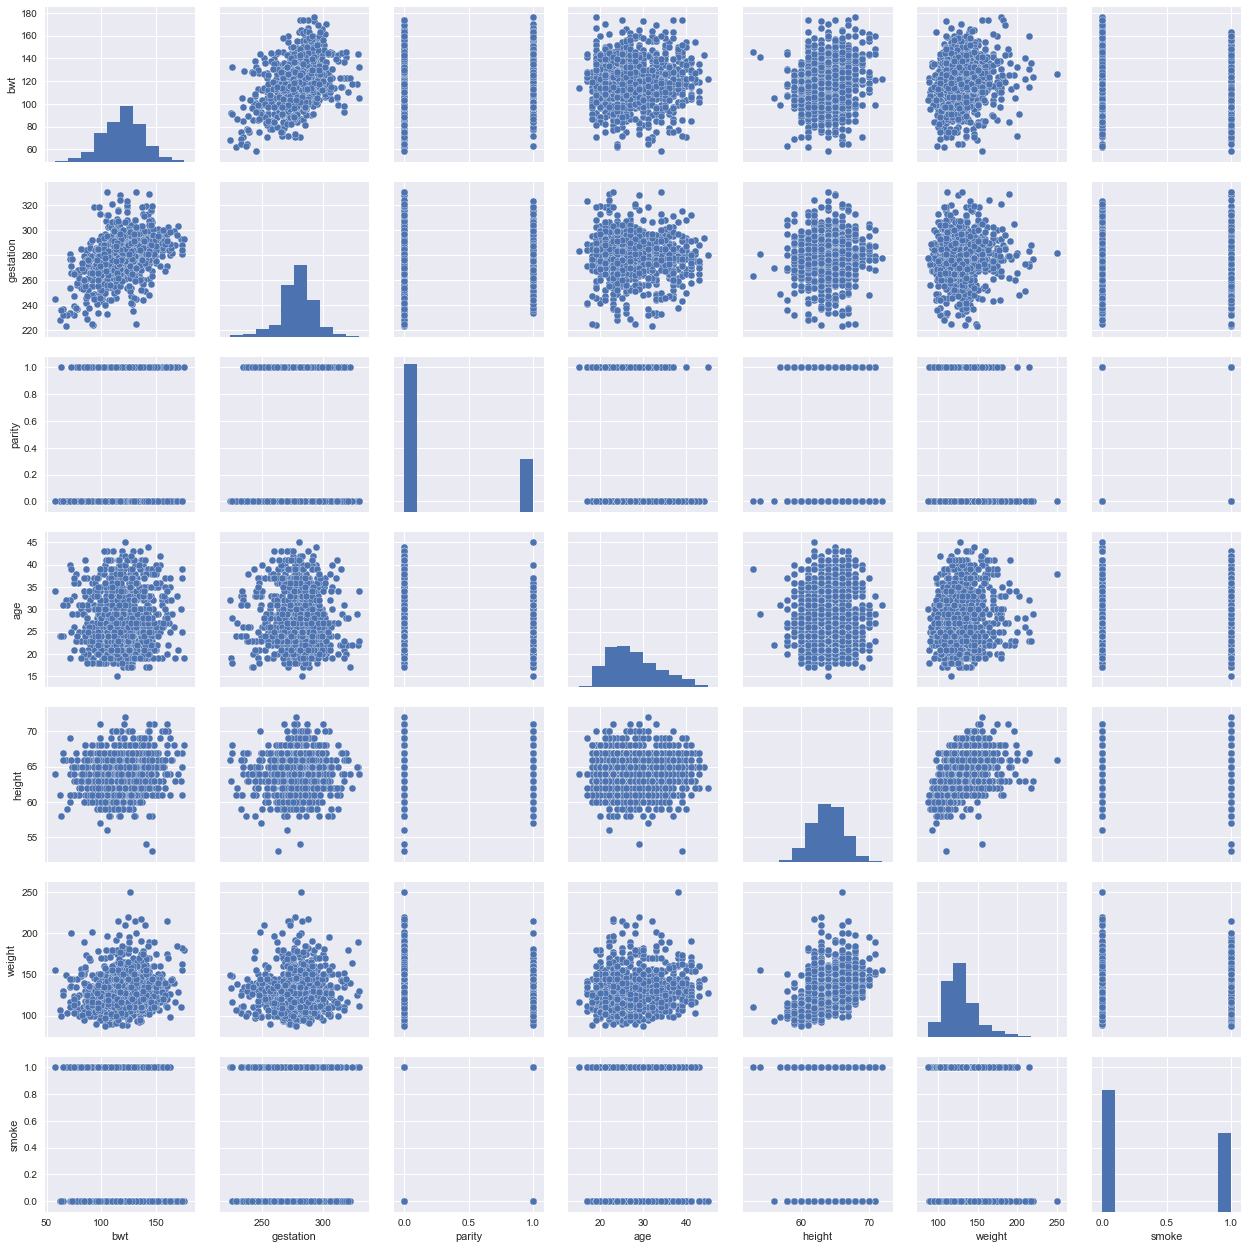

In [44]:
#sns.pairplot(df, dropna=True) #Error if there are NAs in the data
plot_df = df.dropna()
sns.pairplot(plot_df)

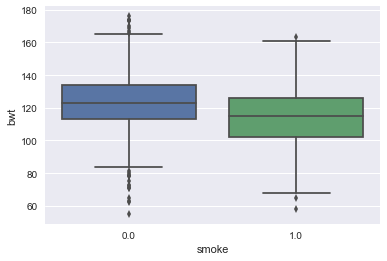

In [33]:
#sns.boxplot(x="smoke", y="gestation", data=df)
sns.boxplot(x="smoke", y="bwt", data=df)

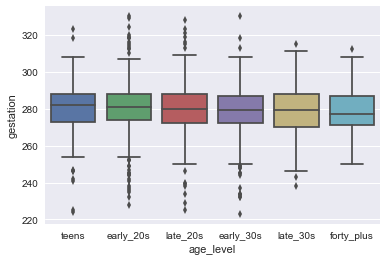

In [34]:
sns.boxplot(x="age_level", y="gestation", data=df)

<b>Use distplot() for a quick view of a univariate distribution.<br> 
By default, this will draw a histogram and fit a kernel density estimate (KDE).<br>
Notice the y axis can be counts or density of observations.</b><br>
See https://seaborn.pydata.org/tutorial/distributions.html

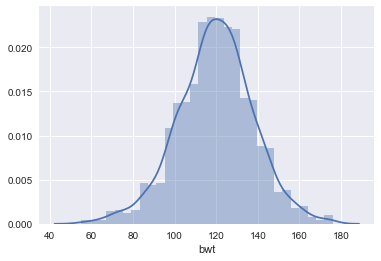

In [39]:
sns.distplot(df.bwt)

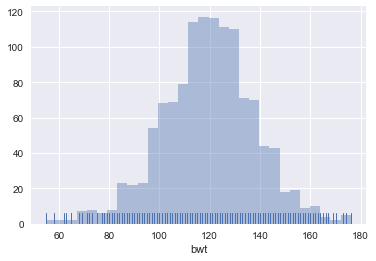

In [38]:
sns.distplot(df.bwt, bins= 30, kde=False, rug=True)

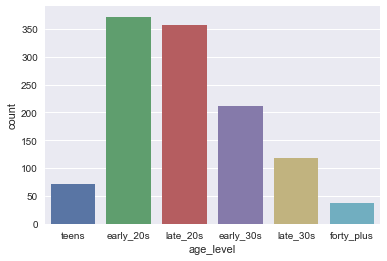

In [64]:
sns.countplot(x="age_level", data= plot_df)

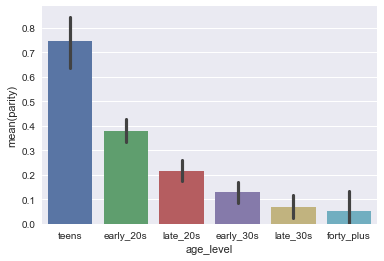

In [66]:
sns.barplot(x="age_level",   y="parity", data=plot_df)

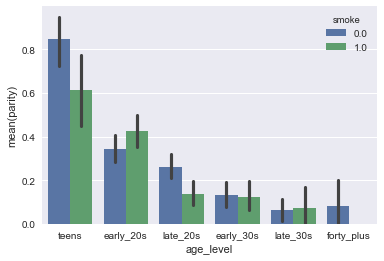

In [65]:
sns.barplot(x="age_level",   y="parity", hue="smoke", data=plot_df)

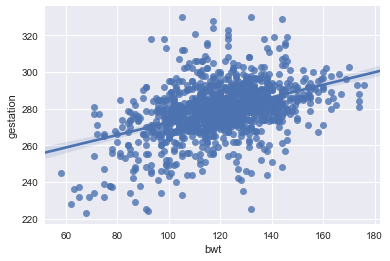

In [53]:
 sns.regplot(x="bwt", y="gestation", data=plot_df)  ###########################

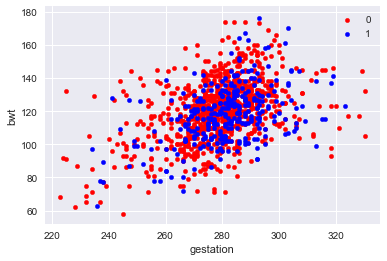

In [57]:
fig, ax = plt.subplots()
colors =   {0:'red', 1:'blue'} 
grouped = plot_df.groupby('parity')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='gestation', y='bwt', label=key, color=colors[key])
plt.show()

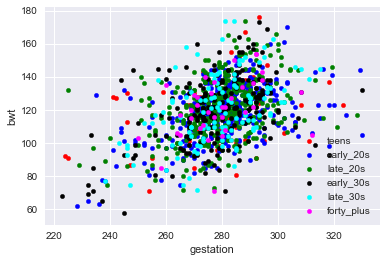

In [58]:
fig, ax = plt.subplots()
colors ={'teens':'red', 'early_20s':'blue', 'late_20s':'green', 'early_30s':'black', 'late_30s':'cyan', 'forty_plus':'magenta', }
grouped = plot_df.groupby('age_level')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='gestation', y='bwt', label=key, color=colors[key])
plt.show()